In [2]:
pip install pytube3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import pandas as pd
import numpy as np

import urllib
from bs4 import BeautifulSoup
from pytube import YouTube
import cv2
import os
import glob

In [3]:
classes = pd.read_json('MSASL_classes.json')
synonym = pd.read_json('MSASL_synonym.json')
train = pd.read_json('MSASL_train.json')
val = pd.read_json('MSASL_val.json')
test = pd.read_json('MSASL_test.json')

In [10]:
train['label'].value_counts()

3      57
1      54
8      53
14     50
2      50
       ..
922     3
552     2
959     2
961     2
809     1
Name: label, Length: 1000, dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16054 entries, 0 to 16053
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   org_text    16054 non-null  object 
 1   clean_text  16054 non-null  object 
 2   start_time  16054 non-null  float64
 3   signer_id   16054 non-null  int64  
 4   signer      16054 non-null  int64  
 5   start       16054 non-null  int64  
 6   end         16054 non-null  int64  
 7   file        16054 non-null  object 
 8   label       16054 non-null  int64  
 9   height      16054 non-null  int64  
 10  fps         16054 non-null  float64
 11  end_time    16054 non-null  float64
 12  url         16054 non-null  object 
 13  text        16054 non-null  object 
 14  box         16054 non-null  object 
 15  width       16054 non-null  int64  
 16  review      5169 non-null   float64
dtypes: float64(4), int64(7), object(6)
memory usage: 2.1+ MB


In [75]:
def fileName(idx_col, label_col):
    filename = []
    for idx, label in zip(idx_col, label_col):
        print(idx, label)
        # y =  str(str(idx)+'-'+str(label_col))
    #     filename.append(y)
    # return filename

In [83]:
str(train.index[0])+str(train.label[0])

'0830'

In [99]:
def fileName(df, label):
    for i in range(len(df.index)):
        df['filename'][i] = str(df.index[i])+'-'+str(df.label[i])
    return df

In [100]:
fileName(train, 'label')

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review,filename
0,match [light-a-MATCH],match,0.000,0,0,0,83,match light-a-MATCH,830,360,30.000,2.767,https://www.youtube.com/watch?v=C37R_Ix8-qs,match,"[0.057544618844985004, 0.21637457609176602, 1....",640,NaN,0-830
1,FAIL,fail,0.000,0,-1,0,74,FAIL,542,360,25.000,2.960,https://www.youtube.com/watch?v=PIsUJl8BN_I,fail,"[0.06577941775321901, 0.167171776294708, 0.939...",480,NaN,1-542
2,laugh,laugh,0.000,4,26,0,31,SignSchool Laugh with Legs 2,312,360,29.970,1.034,www.youtube.com/watch?v=9FdHlMOnVjg,laugh,"[0.131885945796966, 0.32334136962890603, 1.0, ...",640,NaN,2-312
3,BOOK,book,0.000,0,-1,0,66,BOOK(3),38,360,25.000,2.640,https://www.youtube.com/watch?v=J7tP98oDxqE,book,"[0.055698871612548, 0.25173279643058705, 0.996...",480,NaN,3-38
4,sign-language,sign language,0.000,0,-1,0,75,SIGN-LANGUAGE-S-CLAW-F,848,360,29.970,2.502,www.youtube.com/watch?v=N2mG9ZKjrGA,sign language,"[0.039043992757797005, 0.24198183417320202, 1....",640,NaN,4-848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16049,WRITE,write,539.939,32,17,16182,16301,ASL 1 Unit 1 Vocabulary,53,360,29.970,543.910,https://www.youtube.com/watch?v=fNg_sJ9f8EI,write,"[0.032177031040191005, 0.31613153219223, 1.0, ...",640,NaN,16049-53
16050,hot,hot,0.000,2,42,0,127,Hot,135,360,29.657,4.282,https://www.youtube.com/watch?v=MkXUHhsMAns,hot,"[0.000367134809494, 0.20649650692939703, 1.0, ...",640,NaN,16050-135
16051,hi,hi,0.000,0,0,0,47,Hi,379,360,29.970,1.568,www.youtube.com/watch?v=rhfJGeMDMzQ,hi,"[0.013705313205718002, 0.17314371466636602, 1....",640,NaN,16051-379
16052,Learn,learn,0.000,135,-1,0,104,ASL Learn,22,360,30.000,3.467,https://www.youtube.com/watch?v=n-b2NMAwk28,learn,"[0.18269836902618403, 0.19255371391773202, 1.0...",480,NaN,16052-22


In [36]:
def download_video(url, path=None):
    try:
        yt = YouTube(url)
        if yt != EnvironmentError:
            yt = yt.streams.first()
            out_file = yt.download(ouu)
            file_name = out_file.split("\\")[-1]
            print(f"Downloaded {file_name} correctly!")
        else:
            print(f"Video {url} too long")
    except Exception as exc:
        print(f"Download of {url} did not work because of {exc}...")

In [39]:
download_video('https://www.youtube.com/watch?v=mC0lNJ6iz-s', 'train/')

Downloaded /Users/lesropro/galvanize/capstones/MS-ASL/train/ASL 1 Unit 5 Vocabulary.mp4 correctly!


In [44]:
matchArray = train[train['label'] == 830]['url']

In [46]:
for i in matchArray:
    YouTube(str(i)).streams.first().download()

In [14]:
# import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm

Using TensorFlow backend.


In [19]:
train = pd.DataFrame()

In [31]:
count = 0
videoFile = "match.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(30) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [22]:
videoFile = "match.mp4"
cap = cv2.VideoCapture(videoFile)  
frameId = cap.get(30)

In [26]:
cap.read()[1].shape

(360, 480, 3)

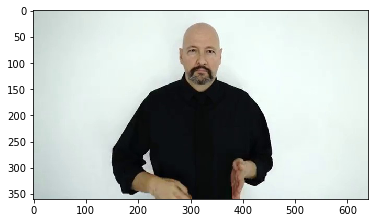

In [20]:
img = plt.imread('match/frame17.jpg')
plt.imshow(img)

In [48]:
train['box'][0]

[0.057544618844985004, 0.21637457609176602, 1.0, 0.7300844192504881]

In [49]:
from moviepy.editor import *

In [51]:
vid = VideoFileClip('Furniture and Objects Vocabulary  ASL - American Sign Language.mp4').subclip(210.344,213.413)

In [50]:
synonym

,0,1,2,3,4
0,father,dad,daddy,None,None
1,mother,mom,mommy,None,None
2,shoes,shoe,None,None,None
3,pants,pant,None,None,None
4,color,colors,None,None,None
...,...,...,...,...,...
267,teach,educate,None,None,None
268,bug,insect,None,None,None
269,asl,#asl,None,None,None
270,hungry,wish,None,None,None


In [52]:
vid

In [74]:
df_people = [i for i in range(10,110,10)]
seconds_per_video = 5
days_in_year = 365
videos_per_day = [i for i in range(2,22,2)]


In [75]:
df_people
videos_per_day

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [81]:
total_vid_per_day = [p*v for p in df_people for v in videos_per_day]

In [82]:
total_vid_per_day

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 40,
 80,
 120,
 160,
 200,
 240,
 280,
 320,
 360,
 400,
 60,
 120,
 180,
 240,
 300,
 360,
 420,
 480,
 540,
 600,
 80,
 160,
 240,
 320,
 400,
 480,
 560,
 640,
 720,
 800,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 120,
 240,
 360,
 480,
 600,
 720,
 840,
 960,
 1080,
 1200,
 140,
 280,
 420,
 560,
 700,
 840,
 980,
 1120,
 1260,
 1400,
 160,
 320,
 480,
 640,
 800,
 960,
 1120,
 1280,
 1440,
 1600,
 180,
 360,
 540,
 720,
 900,
 1080,
 1260,
 1440,
 1620,
 1800,
 200,
 400,
 600,
 800,
 1000,
 1200,
 1400,
 1600,
 1800,
 2000]

In [8]:
yt = YouTube('https://www.youtube.com/watch?v=7YYB3BEoksc')
duration = int(yt.player_config_args['player_response']['streamingData']['formats'][0]['approxDurationMs'])

KeyError: 'player_response'

In [22]:
vid = YouTube('https://www.youtube.com/watch?v=mC0lNJ6iz-s').streams.first()

In [18]:
vid.download()

'/Users/lesropro/galvanize/capstones/MS-ASL/ASL 1 Unit 5 Vocabulary.mp4'

In [101]:
def pullURL(urlList, fNamelist, path=None):
    """
    save all videos locally into relative directory and assign unique filename

    Parameters:
        urlList (list/array): url of all videos to download
        fNamelist (list/array): unique file names for each video
        path (string): relative directory to save each video

    Returns:
        None
    """
    vidList = []
    for url, fname in zip(urlList, fNamelist):
        try:
            vid = YouTube(str(url)).streams.first().download(output_path=path, filename=fname)
            file_name = out_file.split("\\")[-1]
        except:
            continue

In [104]:
test = train[train['label'] == 830][['url', 'filename']]

In [105]:
pullURL(test['url'], test['filename'], 'train/')